# Random Forest and Decision Tree Algorithm Project 


# Project Objectives and background

The objective of this project is to predict which borrowers will likely pay back loan in full. 

Lending Club is a platform that links borrowers with investors who are willing to provide them with funds. As an investor, it is preferable to invest in borrowers who have a higher likelihood of repaying their debts. The aim of this project is to develop a predictive model that will assist in identifying such borrowers.

The already cleaned dataset used in this project covers the period before Lending Club went public and ranges from 2007 to 2010. The focus is on classifying and predicting whether a borrower paid back their loan in full. 

Here are the name of data columns and what they represent:

*credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

*purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

*int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

*installment: The monthly installments owed by the borrower if the loan is funded.

*log.annual.inc: The natural log of the self*reported annual income of the borrower.

*dti: The debt*to*income ratio of the borrower (amount of debt divided by annual income).

*fico: The FICO credit score of the borrower.

*days.with.cr.line: The number of days the borrower has had a credit line.

*revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

*revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

*inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

*delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Relevant Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
loans = pd.read_csv('loan_data.csv')

In [62]:
loans.shape

(9578, 14)

In [63]:
loans.info()

#LEARNING:No significant cleaning required as we see 9578 non-nulls for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [64]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [65]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Expoloration

<AxesSubplot:xlabel='fico', ylabel='Count'>

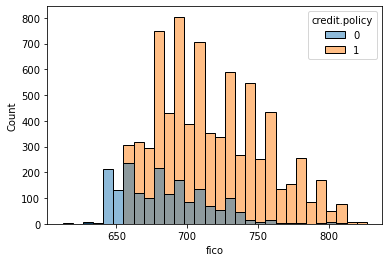

In [66]:
# Histogram for the 'fico' column with hue based on the 'credit.policy' column
sns.histplot(data=loans, x='fico', hue='credit.policy', bins=30)

#LEARNING:Lower count of people not meeting loan criteria probably due to lower FICO score

<AxesSubplot:xlabel='fico', ylabel='Count'>

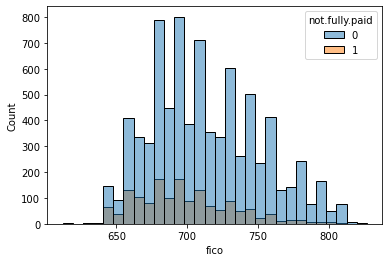

In [67]:
# Histogram for the 'fico' column with hue based on the 'not.fully.paid' column
sns.histplot(data=loans, x='fico', hue='not.fully.paid', bins=30)

#LEARNING: Most of those not fully paid mostly with lower FICO score.Only very few with higher score did not pay.FICO is a good determinant of the who will pay or not.

<AxesSubplot:xlabel='purpose', ylabel='count'>

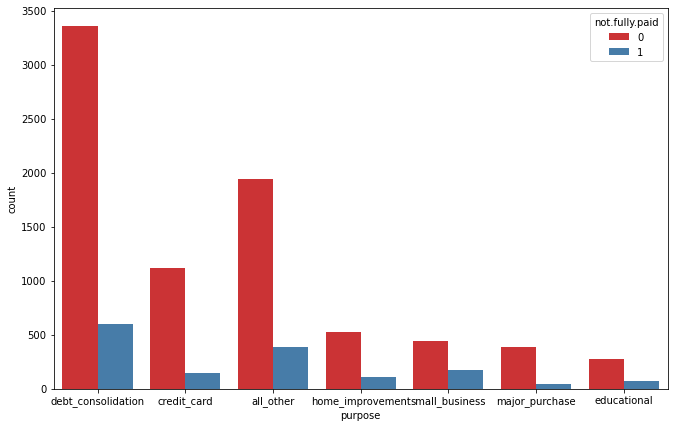

In [68]:
#Loan purpose

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

#LEARNING:Similar loan purpose behavior among thse who paid and those who did not.Debt consolidation and credit card are top 2 reasons.

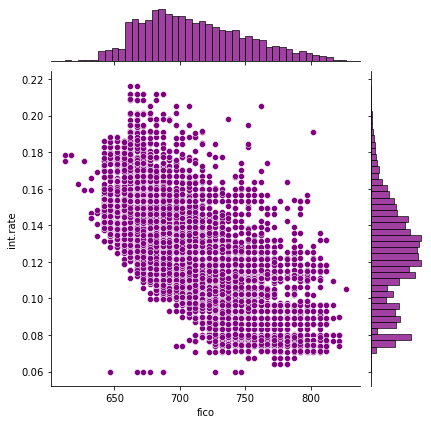

In [69]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

#LEARNING: As the FICO score goes up, the risks are lower and hence the interest rates also go down.

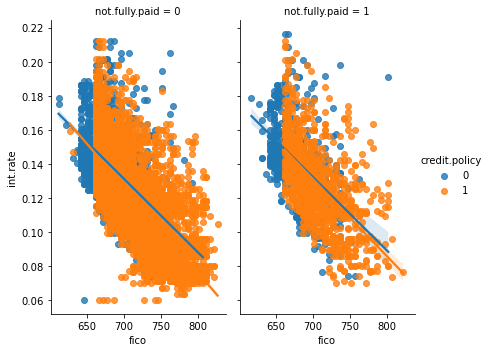

In [70]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', aspect=0.6)

#LEARNING: Intrest rate and Fico relationship trend is same across between fully paid and not fully paid. What distinguishes between fully and not fully paid? It is the type of purpose that seems higher among defaultors. 

# Apply DECISION TREE Machine Learning Algorithm/Model

As the purpose column is categorical with multiple categories, we need first to convert them to dummy variables for the algorithm to incorporate this variable into the Machine Learning(ML) model.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [71]:
#Convert 'purpose' column into variables
cat_feats = ['purpose']

In [72]:
#Final data with purpose column
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [73]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Train Test Split
Now its time to split our data into a training set and a testing set!

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Define Y, the dependent variable who did not fuly paid
loans['not.fully.paid'] = loans['not.fully.paid'].apply(lambda x: 1 if x == 'Yes' else 0)

In [76]:
#Y is the dependent variable and X is the independent variabe here
X = final_data.drop('not.fully.paid',axis=1)  #Column(axis 1) not paid fully is dropped because model will learn from data without knowing variable Y.
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

In [77]:
#Let's start by training a single decision tree first!
from sklearn.tree import DecisionTreeClassifier


In [78]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [79]:
predictions = dtree.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix


In [81]:
print(confusion_matrix(y_test,predictions))

[[1997  434]
 [ 342  101]]


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



# Training the Random Forest model

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [84]:
predictions = rfc.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))


[[2424    7]
 [ 432   11]]


In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



# What performed better the random forest or the decision tree?
Results from Random Forest vs Decision Tree, seem to be better model considering the TP in the Confusion Matrix and accuracy numbers in the classification report. Some model further fine tuning and feature engineering may be appropriate, before deployment  by looking at R-square and other metrics such as MSE etc.